<a href="https://colab.research.google.com/github/NotSrihan/CS290/blob/main/ForestFires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
pip install ucimlrepo

In [40]:
import pandas as pd
import math
import numpy as np

In [41]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
algerian_forest_fires = fetch_ucirepo(id=547)

# data (as pandas dataframes)
X = algerian_forest_fires.data.features
y = algerian_forest_fires.data.targets

# metadata
print(algerian_forest_fires.metadata)

# variable information
print(algerian_forest_fires.variables)


{'uci_id': 547, 'name': 'Algerian Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/547/data.csv', 'abstract': 'The dataset includes 244 instances that regroup a data of two regions of Algeria.', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 244, 'num_features': 14, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Classes  '], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Mar 19 2024', 'dataset_doi': '10.24432/C5KW4N', 'creators': [' Faroudja Abid'], 'intro_paper': {'ID': 325, 'type': 'NATIVE', 'title': ' Predicting Forest Fire in Algeria Using Data Mining Techniques: Case Study of the Decision Tree Algorithm', 'authors': 'Faroudja Abid, N.Izeboudjen', 'venue': 'Ezziyyani M. (eds) Advanced Intelligent Systems

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5    RH          244 non-null    int64  
 6    Ws          244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    object 
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [43]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Classes    243 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [44]:

df = pd.concat([X,y], axis=1)

dfused = ['region', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'month', "Classes  "]
DFused = df[dfused]

In [45]:
DFused.head()

,region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,month,Classes
0,Bejaia,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,6,not fire
1,Bejaia,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,6,not fire
2,Bejaia,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,6,not fire
3,Bejaia,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,6,not fire
4,Bejaia,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,6,not fire


In [46]:
DFused.nunique()

,0
region,2
Temperature,19
RH,62
Ws,18
Rain,39
FFMC,173
DMC,166
DC,198
ISI,106
BUI,174


In [47]:
DFused.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       244 non-null    object 
 1   Temperature  244 non-null    int64  
 2    RH          244 non-null    int64  
 3    Ws          244 non-null    int64  
 4   Rain         244 non-null    float64
 5   FFMC         244 non-null    float64
 6   DMC          244 non-null    float64
 7   DC           244 non-null    object 
 8   ISI          244 non-null    float64
 9   BUI          244 non-null    float64
 10  FWI          244 non-null    object 
 11  month        244 non-null    int64  
 12  Classes      243 non-null    object 
dtypes: float64(5), int64(4), object(4)
memory usage: 24.9+ KB


In [79]:
target = "Rain"

In [98]:
# Calculate the entropy categorical feature
def cat_var_entropy(df, target, feature):

    entropies = []
    vals = df[feature].unique()
    overall = len(df)
    for val in vals:
        entropy = 0  # Initialize entropy for each unique value
        subset = df[df[feature] == val]
        subset_size = len(df[df[feature] == val])  # Size of subset for the current value
        weight = subset_size / overall  # Weight of the subset
        weight = subset_size / overall  # Weight of the subset

        # Only calculate entropy if the subset has elements
        if subset_size > 0:
            props = subset[target].value_counts(normalize=True)  # Proportion of target values
            for prop in props:
                if prop > 0:  # Only add to entropy if probability is non-zero
                    entropy -= prop * math.log2(prop)
            entropies.append(weight * entropy)  # Weighted entropy value for the subset

    # Check if entropies list is empty before calculating the minimum
    if entropies: # <----- This line was added
        return min(entropies)  # Return the minimum entropy value

In [50]:
# Calculate the Gini index for a categorical feature
def cat_var_gini(df, target, feature):
  ginis = []  # List to store Gini values
  vals = df[feature].unique()  # Get unique values for the feature
  overall = len(df)  # Total number of rows
  for val in vals:
    subset_size = len(df[df[feature] == val])  # Size of subset for the current value
    weight = subset_size / overall  # Weight of the subset
    props = df[df[feature] == val][target].value_counts(normalize=True)  # Get the proportion of target values
    gini_value = 1 - np.sum(np.square(props))  # Calculate Gini for the current value
    ginis.append(weight * gini_value)  # Append weighted Gini value to the ginis list
  return min(ginis)  # Return the minimum Gini value

In [51]:
def numeric_entropy(df, target, feature):
    entropies = []  # List to store entropy values
    splits = []  # List to store split points
    vals = np.sort(df[feature].unique())  # Sorted unique values for the feature
    overall = len(df)  # Total number of rows
    for val in vals:
        entropy = 0  # Initialize entropy for each unique value
        # Split the data into two subsets: <= val and > val
        left = df[df[feature] <= val][[feature, target]]
        right = df[df[feature] > val][[feature, target]]

        # Calculate the entropy for the left subset
        props_left = left[target].value_counts(normalize=True)
        weight_left = len(left) / overall
        for prop in props_left:
            if prop > 0:
                entropy -= weight_left * prop * math.log2(prop)

        # Calculate the entropy for the right subset
        props_right = right[target].value_counts(normalize=True)
        weight_right = len(right) / overall
        for prop in props_right:
            if prop > 0:
                entropy -= weight_right * prop * math.log2(prop)

        entropies.append(entropy)  # Append entropy value to the list
        splits.append(val)  # Append split point to the list

    min_entropy = np.min(entropies)  # Get the minimum entropy value
    best_split = splits[np.argmin(entropies)]  # Find the corresponding split point
    return min_entropy, best_split


In [82]:
# Calculate the Gini index for a quantitative feature
def numeric_gini(df, target, feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    ginis = []  # List to store Gini values
    splits = []  # List to store split points
    vals = np.sort(df[feature].unique())  # Sorted unique values for the feature
    overall = len(df)  # Total number of rows
    for val in vals:
        gini = 0  # Initialize Gini index for each unique value
        # Split the data into two subsets: <= val and > val
        left = df[df[feature] <= val][[feature, target]]
        right = df[df[feature] > val][[feature, target]]

        # Calculate the Gini for the left subset
        props_left = left[target].value_counts(normalize=True)
        weight_left = len(left) / overall
        gini_left = 1 - np.sum(np.square(props_left))

        # Calculate the Gini for the right subset
        props_right = right[target].value_counts(normalize=True)
        weight_right = len(right) / overall
        gini_right = 1 - np.sum(np.square(props_right))

        # Combine Gini values and append to the list
        gini = weight_left * gini_left + weight_right * gini_right
        ginis.append(gini)
        splits.append(val)

    min_gini = np.min(ginis)  # Get the minimum Gini value
    best_split = splits[np.argmin(ginis)]  # Find the corresponding split point
    return min_gini, best_split


def cat_var_check(df, feature):
    return df[feature].nunique() < 8  # A feature is considered categorical if it has fewer than 8 unique values


In [111]:
# Main attribute selection method function
def attribute_selection_method(df, target, measure):
    cat_list = []  # Store results for categorical features
    cat_feat_list = []  # Store categorical feature names
    quant_list = []  # Store results for quantitative features
    quant_feat_list = []  # Store quantitative feature names
    splits = []  # Store best split points for quantitative features
    features = df.columns.drop(target)  # Get all features except the target

    for feature in features:
        if df[feature].dtype == 'object':  # If feature is categorical
            if measure == 'entropy':
                result = cat_var_entropy(df, target, feature)
                if result is not None:
                  cat_list.append(result)
            elif measure == 'gini':
                result = cat_var_gini(df, target, feature)
            cat_list.append(result)
            cat_feat_list.append(feature)
        elif df[feature].dtype in ['float64', 'int64']:  # If feature is quantitative
            if measure == 'entropy':
                min_entropy, best_split = numeric_entropy(df, target, feature)
                quant_list.append(min_entropy)
                splits.append(best_split)
            elif measure == 'gini':
                min_gini, best_split = numeric_gini(df, target, feature)
                quant_list.append(min_gini)
                splits.append(best_split)
            quant_feat_list.append(feature)

    # Determine the best feature and split point
    if cat_list and min(cat_list) <= min(quant_list):
        return cat_feat_list[np.argmin(cat_list)]
    else:
        best_index = np.argmin(quant_list)
        return quant_feat_list[best_index], splits[best_index]



In [54]:
def mean_sq_error_cat(df, target, feature):
    MSE = []
    splits = []
    vals = df[feature].unique()
    overall = len(df)

    for val in vals:
        # Split into left (matching category) and right (not matching category) subsets
        left = df[df[feature] == val][target]
        right = df[df[feature] != val][target]

        # Calculate MSE for left and right subsets
        if len(left) > 0:
            mse_left = np.mean((left - left.mean()) ** 2)
        else:
            mse_left = 0

        if len(right) > 0:
            mse_right = np.mean((right - right.mean()) ** 2)
        else:
            mse_right = 0

        # Weighted average of the MSEs
        weight_left = len(left) / overall
        weight_right = len(right) / overall
        mse = weight_left * mse_left + weight_right * mse_right

        MSE.append(mse)
        splits.append(val)

    # Return the minimum MSE value and the best category split
    min_mse = np.min(MSE)
    best_split = splits[np.argmin(MSE)]
    return min_mse, best_split

In [55]:
# MSE for quantitative features regression
def mean_sq_error_numeric(df, target, feature):
    MSE = []
    splits = []
    vals = np.sort(df[feature].unique())
    overall = len(df)

    for val in vals:
        # Split into left and right subsets
        left = df[df[feature] <= val][target]
        right = df[df[feature] > val][target]

        # Calculate MSE for left and right subsets
        if len(left) > 0:
            mse_left = np.mean((left - left.mean()) ** 2)
        else:
            mse_left = 0

        if len(right) > 0:
            mse_right = np.mean((right - right.mean()) ** 2)
        else:
            mse_right = 0

        # Weighted average of the MSEs
        weight_left = len(left) / overall
        weight_right = len(right) / overall
        mse = weight_left * mse_left + weight_right * mse_right

        MSE.append(mse)
        splits.append(val)

    #return the minimum mean squared errror value as well as the split at the matching index
    min_mse = np.min(MSE)
    best_split = splits[np.argmin(MSE)]
    return min_mse, best_split

In [56]:
mean_sq_error_cat(DFused, 'Rain ', "Classes  ")

(2.65049959355101, 'not fire')

In [57]:
mean_sq_error_cat(DFused, "Rain ", 'month')

(3.9215949602043234, 9)

In [119]:
def reg_selection(df, target):
    cat_list = []  # Stores results for categorical features
    cat_feat_list = []  # Stores categorical feature names
    quant_list = []  # Stores results for quantitative features
    quant_feat_list = []  # Stores quantitative features
    splits = []  # Store split points for quantitative features
    features = df.columns.drop(target)  # Get all features except the target
    if not pd.api.types.is_numeric_dtype(df[target]):
        raise ValueError(f"Target variable '{target}' is not numeric!")

    for feature in features:
        if cat_var_check(df, feature):  # If feature is categorical
            min_mse, _ = mean_sq_error_cat(df, target, feature)
            cat_list.append(min_mse)
            cat_feat_list.append(feature)

        elif not cat_var_check(df, feature):  # If feature is quantitative
            min_mse, best_split = mean_sq_error_numeric(df, target, feature)
            quant_list.append(min_mse)
            quant_feat_list.append(feature)
            splits.append(best_split)


     # Determine the best feature and split point
    if cat_list and min(cat_list) <= min(quant_list):
        return cat_feat_list[np.argmin(cat_list)]
    else:
        best_index = np.argmin(quant_list)
        return quant_feat_list[best_index], quant_list[best_index], splits[best_index]

In [59]:
DFused.head()

,region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,month,Classes
0,Bejaia,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,6,not fire
1,Bejaia,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,6,not fire
2,Bejaia,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,6,not fire
3,Bejaia,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,6,not fire
4,Bejaia,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,6,not fire


In [60]:
def attribute_selection_method1(df, target, task, measure=None):
    if task.lower() == 'classification':
        return attribute_selection_method(df, target, measure)
    elif task.lower() == 'regression':
        return reg_selection(df, target)
    else:
        raise ValueError("Invalid task. Must be 'classification' or 'regression'.")

In [61]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(DFused, test_size=0.2)

X_train = train_set[['region', 'Temperature', ' RH',"Rain ", ' Ws',  'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'month']]
y_train = train_set['Temperature']
X_test = test_set[['region', 'Temperature', ' RH',"Rain ", ' Ws',  'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'month']]
y_test = test_set['Temperature']

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 2 to 3
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       195 non-null    object 
 1   Temperature  195 non-null    int64  
 2    RH          195 non-null    int64  
 3   Rain         195 non-null    float64
 4    Ws          195 non-null    int64  
 5   FFMC         195 non-null    float64
 6   DMC          195 non-null    float64
 7   DC           195 non-null    object 
 8   ISI          195 non-null    float64
 9   BUI          195 non-null    float64
 10  FWI          195 non-null    object 
 11  month        195 non-null    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 19.8+ KB


In [64]:
num_attributes = X_train.select_dtypes(include = ['float64']).columns
cat_attributes = X_train.select_dtypes(include = ['object']).columns

trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )
reg_pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeRegressor(max_depth=3))])

In [65]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Modify the pipeline to include imputation and encoding
num_attributes = X_train.select_dtypes(include=['float64']).columns
cat_attributes = X_train.select_dtypes(include=['object']).columns

# Create pipelines for numerical and categorical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing numerical values with the median
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_attributes),
        ('cat', cat_pipeline, cat_attributes),
    ])

# Encode the target variable
label_encoder = LabelEncoder()
# Fit on both train/test data
label_encoder.fit(pd.concat([y_train, y_test]))
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train = y_train.fillna(y_train.mode()[0])

# Creates final pipeline
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=3)),
])

# Perform cross-validation
cv_scores = cross_val_score(reg_pipeline, X_train, y_train_encoded, cv=5, scoring='neg_mean_squared_error')  # Use encoded y_train
cv_scores

array([ -6.8863874 , -10.62587965,  -6.41325407,  -7.03200163,
        -8.21085864])

In [66]:

class_pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [67]:
mse_scores = cv_scores * -1
mse_scores

array([ 6.8863874 , 10.62587965,  6.41325407,  7.03200163,  8.21085864])

In [68]:
reg_pipeline.fit(X_train, y_train)
reg_predictions = reg_pipeline.predict(X_test)

[Text(0.5, 0.875, 'x[1] <= -0.231\nsquared_error = 13.171\nsamples = 195\nvalue = 32.056'),
 Text(0.25, 0.625, 'x[1] <= -1.527\nsquared_error = 7.826\nsamples = 61\nvalue = 28.902'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[114] <= 0.5\nsquared_error = 4.981\nsamples = 19\nvalue = 26.421'),
 Text(0.0625, 0.125, 'squared_error = 2.997\nsamples = 17\nvalue = 26.941'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 22.0'),
 Text(0.375, 0.375, 'x[0] <= -0.091\nsquared_error = 5.071\nsamples = 42\nvalue = 30.024'),
 Text(0.3125, 0.125, 'squared_error = 2.796\nsamples = 17\nvalue = 28.706'),
 Text(0.4375, 0.125, 'squared_error = 4.634\nsamples = 25\nvalue = 30.92'),
 Text(0.75, 0.625, 'x[1] <= 0.821\nsquared_error = 9.011\nsamples = 134\nvalue = 33.493'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= -0.327\nsquared_error = 7.24\nsamples = 104\nvalue = 32.76'),
 Text(0.5625, 0.125, 'squared_error = 6.706\nsamples = 77\nvalue = 32.091'),
 Text(0.6875

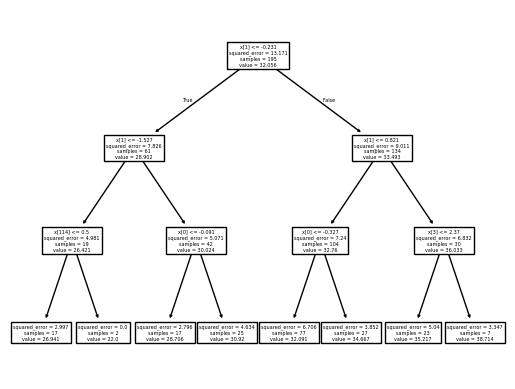

In [69]:
plot_tree(reg_pipeline.named_steps['regressor'])

In [70]:
class_pipeline.fit(X_train, y_train)
class_predictions = class_pipeline.predict(X_test)

[Text(0.4583333333333333, 0.875, 'x[1] <= -0.231\ngini = 0.917\nsamples = 195\nvalue = [2.0, 3.0, 4.0, 4.0, 7.0, 12.0, 13.0, 20.0, 22.0\n15.0, 20.0, 18.0, 25.0, 15.0, 4.0, 2.0, 6.0, 2.0\n1.0]'),
 Text(0.25, 0.625, 'x[119] <= 0.5\ngini = 0.885\nsamples = 61\nvalue = [2, 2, 4, 3, 5, 9, 10, 12, 3, 4, 4, 2, 1, 0\n0, 0, 0, 0, 0]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[118] <= 0.5\ngini = 0.888\nsamples = 57\nvalue = [2, 2, 4, 3, 5, 9, 6, 12, 3, 4, 4, 2, 1, 0\n0, 0, 0, 0, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.88\nsamples = 54\nvalue = [2, 2, 1, 3, 5, 9, 6, 12, 3, 4, 4, 2, 1, 0\n0, 0, 0, 0, 0]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'x[3] <= 0.736\ngini = 0.892\nsamples = 134\nvalue = [0, 1, 0, 1, 2, 3, 

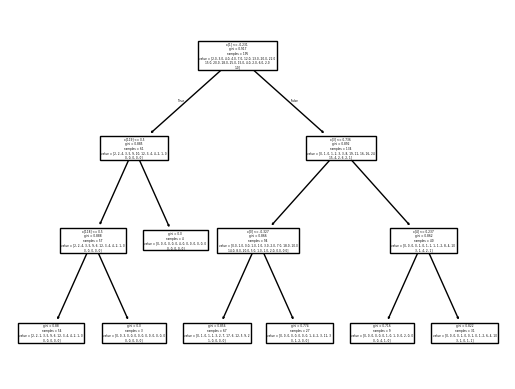

In [71]:
plot_tree(class_pipeline.named_steps['clf'])

In [84]:
task1 = input("Do you want entropy or gini")
attribute_selection_method(df, target,task1)

Do you want entropy or ginientropy


ValueError: min() arg is an empty sequence

In [121]:
df.columns = df.columns.str.strip()
features = df.columns.drop(target)  # Get all features except the target
df_numeric = df.select_dtypes(include=[np.number])
print(df.columns)
print(df.head())

df[target] = df[target].replace({'fire': 1, 'not fire': 0})
df[target].dropna(inplace=True)

task = input("Do you want classification or regression")
if task.lower() == 'classification':

  task1 = input("Do you want entropy or gini")
  attribute_selection_method(df, target, task1)

  if task1.lower() == 'entropy':
    for feature in features:
      entropy_value = cat_var_entropy(df, target, feature)
      print(f"Entropy for {feature}: {entropy_value}")
  elif task1.lower() == 'gini':
    for x in features:
      gini_value = cat_var_gini(df, target,x)
      print(f"Gini for {x}: {gini_value}")  # Print the result for each feature



elif task.lower() == 'regression':

  reg_value = reg_selection(df_numeric, target)
  print (reg_value)


else:
  raise ValueError("Invalid task. Must be 'classification' or 'regression'.")



Index(['region', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')
   region  day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  \
0  Bejaia    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3   
1  Bejaia    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0   
2  Bejaia    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3   
3  Bejaia    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0   
4  Bejaia    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2   

   BUI  FWI  Classes  
0  3.4  0.5      NaN  
1  3.9  0.4      NaN  
2  2.7  0.1      NaN  
3  1.7  0.0      NaN  
4  3.9  0.5      NaN  
Do you want classification or regressionregression
('DC', 0.0, nan)
